In [ ]:
#Satellite Image Classification as either waterbody,Forest, cloud or dessert.

import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=100
CHANNELS=3
EPOCHS=5

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\chara\OneDrive\Documents\data",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 5600 files belonging to 4 classes.


In [ ]:
class_names=dataset.class_names
class_names

['cloudy', 'desert', 'green_area', 'water']

In [ ]:
len(dataset)

56

(100, 256, 256, 3)
[3 2 0 3 0 0 1 3 0 2 2 2 1 2 0 0 2 3 0 2 2 2 0 3 3 3 2 0 0 2 2 0 0 3 1 2 3
 2 2 2 3 2 3 0 2 0 0 0 1 2 3 0 3 1 0 0 2 2 1 3 0 3 0 0 0 2 3 2 0 3 3 3 3 0
 3 1 1 1 1 3 2 1 3 0 0 1 0 2 1 2 3 1 1 3 1 3 1 2 3 0]


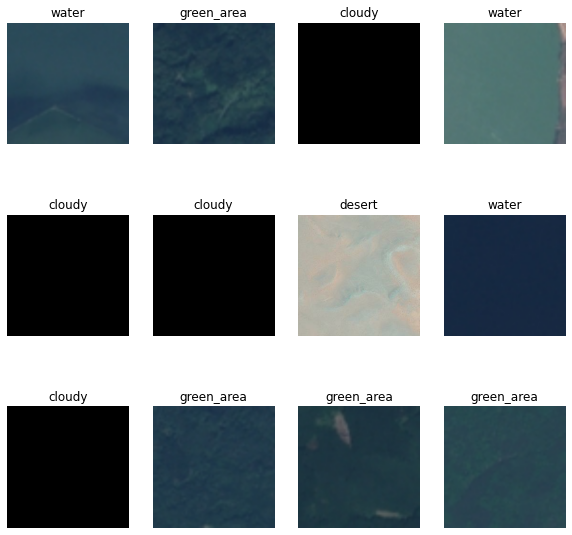

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    
    print(image_batch.shape)
    print(label_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
train_size=0.8
len(dataset)*train_size

44.800000000000004

In [ ]:
len(dataset)

56

In [ ]:
train_ds=dataset.take(44)

len(train_ds)

44

In [ ]:
val_size=0.1
len(dataset)*val_size

5.6000000000000005

In [ ]:
test_ds=dataset.take(5)

In [ ]:
len(test_ds)

5

In [ ]:
val_ds=test_ds.take(5)
len(val_ds)

5

In [ ]:
# test_ds=test_ds.skip(5)
# len(test_ds)

In [ ]:
def get_dataset_partitons_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    test_size=int(test_split*ds_size)
    train_ds=dataset.take(train_size)
    test_ds=dataset.skip(train_size)
    val_ds=test_ds.take(val_size)
    test_ds=test_ds.skip(val_size)
    return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=get_dataset_partitons_tf(dataset)

In [ ]:
len(train_ds)

44

In [ ]:
len(val_ds)

5

In [ ]:
len(test_ds)

7

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=4
model=models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
    
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (100, 256, 256, 3)        0         
                                                                 
 conv2d_6 (Conv2D)           (100, 254, 254, 32)       896       
                                                                 
 max_pooling2d_6 (MaxPooling  (100, 127, 127, 32)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (100, 125, 125, 64)       18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (100, 62, 62, 64)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (100, 60, 60, 64)        

In [ ]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds  
)

Epoch 1/5
44/44 [==============================] - 274s 6s/step - loss: 0.6923 - accuracy: 0.6630 - val_loss: 0.3780 - val_accuracy: 0.8240
Epoch 2/5
44/44 [==============================] - 259s 6s/step - loss: 0.3066 - accuracy: 0.8541 - val_loss: 0.3824 - val_accuracy: 0.8100
Epoch 3/5
44/44 [==============================] - 244s 6s/step - loss: 0.2591 - accuracy: 0.8814 - val_loss: 0.3784 - val_accuracy: 0.7340
Epoch 4/5
44/44 [==============================] - 247s 6s/step - loss: 0.2528 - accuracy: 0.8816 - val_loss: 0.2563 - val_accuracy: 0.9000
Epoch 5/5
44/44 [==============================] - 239s 5s/step - loss: 0.2331 - accuracy: 0.8950 - val_loss: 0.2219 - val_accuracy: 0.9160


In [ ]:
scores=model.evaluate(test_ds)

7/7 [==============================] - 15s 1s/step - loss: 0.1791 - accuracy: 0.9271


In [ ]:
scores

[0.17912176251411438, 0.927142858505249]

In [ ]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 44}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Train Acc')
plt.plot(range(EPOCHS),val_acc,label='Val Acc')
plt.legend(loc='lower right')
plt.title('Train and Validation')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Train Los')
plt.plot(range(EPOCHS),val_loss,label='Val Los')
plt.legend(loc='upper right')
plt.title('Train and Validation')

In [ ]:
num = [0,1,2,3,4,5,6,7,8]
dic = dict(zip(class_names,num))
dic

{'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}

In [ ]:
li = list(dic.keys())
print(li)

['cloudy', 'desert', 'green_area', 'water']


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
class pridict:
    def __init__(self , path):
        image_path=path
        new_img = image.load_img(image_path)
        img = image.img_to_array(new_img)
        img = np.expand_dims(img, axis=0)

        print("Following is our prediction:")
        prediction = model.predict(img)
        # decode the results into a list of tuples (class, description, probability)
        # (one such list for each sample in the batch)
        d = prediction.flatten()
        j = d.max()
        for index,item in enumerate(d):
            if item == j:
                class_name = li[index]

        ##Another way
        # img_class = classifier.predict_classes(img)
        # img_prob = classifier.predict_proba(img)
        # print(img_class ,img_prob )


        #ploting image with predicted class name        
        plt.figure(figsize = (4,4))
        plt.imshow(new_img)
        plt.axis('off')
        plt.title(class_name)
        plt.show()

['cloudy', 'desert', 'green_area', 'water']
actual_label water
predicted label water


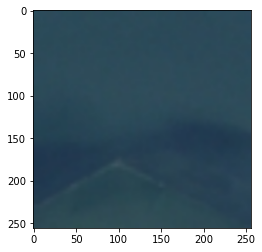

In [ ]:
import numpy as np
print(class_names)
for images_batch,labels_batch in test_ds.take(1):
    
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    
    plt.imshow(first_image)
    print('actual_label',class_names[first_label])
    
    batch_pred=model.predict(images_batch)
    print('predicted label',class_names[np.argmax(batch_pred[0])])

In [ ]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    predictions=model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    
    return predicted_class,confidence

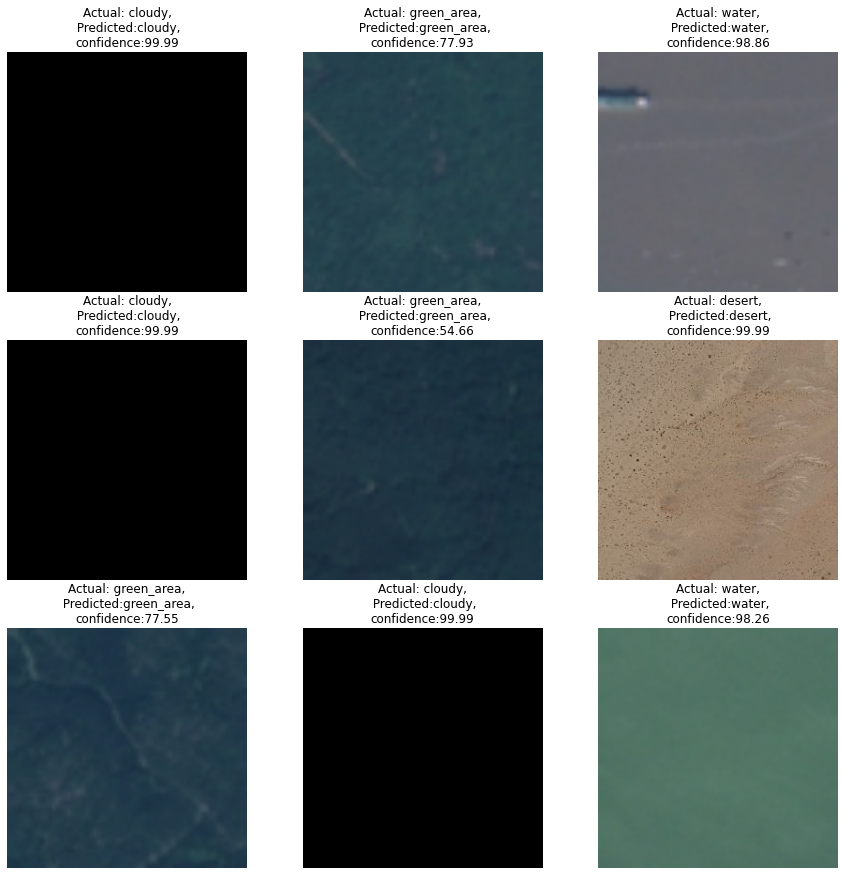

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted:{predicted_class},\nconfidence:{confidence}")
        
        plt.axis('off')